# Overview

## K-Means Clustering Model for Banknote Authentication

Have you ever wondered if the banknote you received in a cash transaction is a genuine or a fake note? I'm making use if Python, Numpy, Pandas and ScikitLearn to classify whether a given set of banknotes are gunuine or forged.

Dataset is about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images. (Source: https://www.openml.org/d/1462)

As I'm a beginner, I'm using below 2 features from the dataset to build K-Means Clustering model.
- V1 - variance of Wavelet Transformed image (continuous)  
- V2 - skewness of Wavelet Transformed image (continuous)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

### Read Dataset

In [3]:
df_original = pd.read_csv('Banknote-authentication-dataset.csv')

### Run basic checks on data

In [4]:
df_original.head()

,V1,V2,Class
0,3.62160,8.6661,1
1,4.54590,8.1674,1
2,3.86600,-2.6383,1
3,3.45660,9.5228,1
4,0.32924,-4.4552,1


###### Check null values, data types & basic statistics

In [5]:
df_original.isnull().sum()

V1       0
V2       0
Class    0
dtype: int64

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   Class   1372 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 32.3 KB


In [7]:
df_original.describe()

,V1,V2,Class
count,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.444606
std,2.842763,5.869047,0.497103
min,-7.042100,-13.773100,1.000000
25%,-1.773000,-1.708200,1.000000
50%,0.496180,2.319650,1.000000
75%,2.821475,6.814625,2.000000
max,6.824800,12.951600,2.000000


In [8]:
# Independent Variables
df = df_original[['V1', 'V2']]

###### Check for outliers in the Dataset

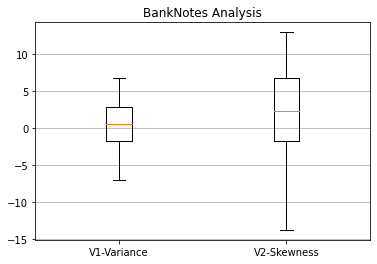

In [9]:
fig, ax = plt.subplots()
ax.boxplot(df)
ax.set_title('BankNotes Analysis')
ax.set_xticklabels(['V1-Variance', 'V2-Skewness'])
ax.yaxis.grid(True)

#### Notes: Dataset is clean - no missing data, no outliers

### Min-Max Normalisation

In [10]:
df.min(), df.max()

(V1    -7.0421
 V2   -13.7731
 dtype: float64,
 V1     6.8248
 V2    12.9516
 dtype: float64)

In [11]:
# min-max normalize - values between 0 & 1
df_norm = (df - df.min()) / (df.max() - df.min())

In [12]:
df_norm.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [13]:
df_norm.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


In [14]:
df_norm.corr()

,V1,V2
V1,1.000000,0.264026
V2,0.264026,1.000000


<AxesSubplot:xlabel='V1', ylabel='V2'>

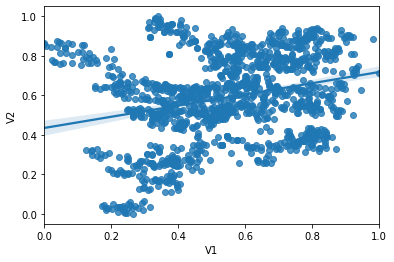

In [15]:
sns.regplot(x='V1', y='V2', data=df_norm)

#### Notes: Positive correlation between features V1 and V2

Text(0, 0.5, 'V2-Skewness')

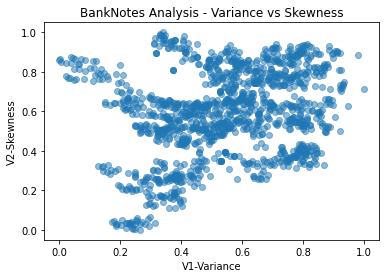

In [16]:
# plot V1 vs V2
plt.scatter('V1', 'V2', data=df_norm,  alpha=0.5)
plt.title('BankNotes Analysis - Variance vs Skewness')
plt.xlabel('V1-Variance')
plt.ylabel('V2-Skewness')

#### Notes: 
There are only 2 features and 1372 rows. <br> 
Looking at the above scatter plot, data is not very widely spread. It is not centered at one place too. <br>
We can try K-Means clustering here however, data is not clustered in spherical shapes, so K-Means clustering model may not work perfectly here.

### Run K-Means

In [17]:
# 2 clusters Fake and Genuine notes
kmeans_res = KMeans(n_clusters=2).fit(df_norm)

In [18]:
kmeans_res.cluster_centers_

array([[0.36955897, 0.44781178],
       [0.67364922, 0.69798136]])

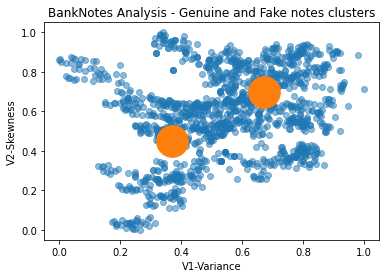

In [19]:
cluster_centers = kmeans_res.cluster_centers_

# plot V1 vs V2 & cluster centers
fig, ax = plt.subplots()
ax.scatter('V1', 'V2', data=df_norm, alpha=0.5)
ax.set_title('BankNotes Analysis - Genuine and Fake notes clusters')
ax.set_xlabel('V1-Variance')
ax.set_ylabel('V2-Skewness')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=1000)

###### Lets repeat the process to ensure there is no significance difference in cluster centers.

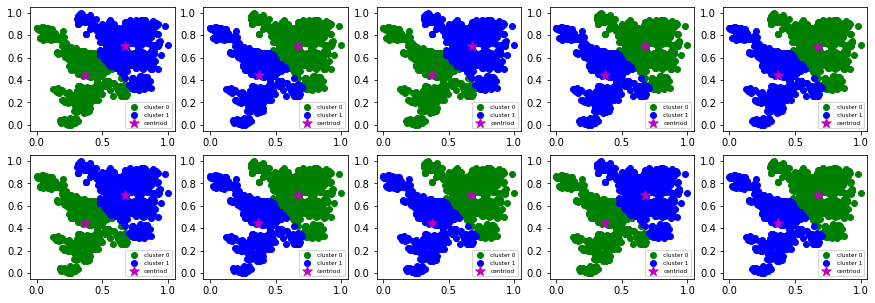

In [20]:
cluster_centers = []
ys = []
ss = []

fig, ax = plt.subplots(2,5,figsize=(15,5))
ax = ax.ravel()
for i in range(10):
    kmeans_res = KMeans(n_clusters=2).fit(df_norm)
    centers = kmeans_res.cluster_centers_
    labels = kmeans_res.labels_
    cluster_centers.append(centers)
    ys.append(labels)
    ss.append(kmeans_res.inertia_)
    
    # plot V1 vs V2 & cluster centers    
    ax[i].scatter('V1', 'V2', data=df_norm[labels == 0], c='g', label='cluster 0')
    ax[i].scatter('V1', 'V2', data=df_norm[labels == 1], c='b', label='cluster 1')
    ax[i].scatter(centers[:,0], centers[:,1], c='m', s= 100, marker='*', label='centriod')
    ax[i].legend(loc='best', fontsize='xx-small')

In [21]:
arr_centers = np.array(cluster_centers)

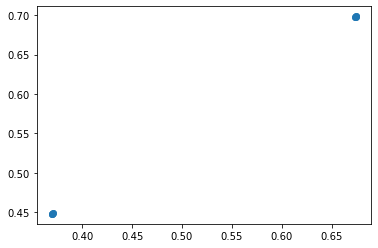

In [22]:
plt.scatter(arr_centers[:,:,0].ravel(), arr_centers[:,:,1].ravel(), alpha=0.5)

#### Notes: From the above plot, we can say that there is no significance difference between cluster centers from each iterations

### Model Evaluation
Compare predictions from each of 10 iterations (ys) with the actual result (df_original.Class)

In [23]:
df_ys = pd.DataFrame(np.column_stack(np.array(ys)))
df_ys

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0
4,0,1,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1367,1,0,1,0,0,1,0,0,1,0
1368,0,1,0,1,1,0,1,1,0,1
1369,0,1,0,1,1,0,1,1,0,1
1370,0,1,0,1,1,0,1,1,0,1


In [24]:
df_val = pd.concat([df_ys, pd.DataFrame(df_original['Class'])], axis=1)
display(df_val.head())

# check how many datpoints match. 
# actual ones have labels 1 & 2 but KMeans predictions have labels 0 & 1
s = df_val['Class'].value_counts()
print('Actual number of data points in each cluster:')
print(s)

unmatch_count = []
# rename prediction labels 1 & 2
try:
    for col in df_val.columns:
        if col == 'Class' : 
            continue

        s1 = df_val[col].value_counts()
        # if label 0 in y matches with 2 in original (cluster1 has 762 notes, cluster2 has 610 notes)
        if s1[0] < 700:
            df_val[col].replace(0,2, inplace=True)
        else:
            df_val[col].replace(1,2, inplace=True)
            df_val[col].replace(0,1, inplace=True)

        unmatch_count.append(len(df_val[df_val[col] != df_val['Class']]))
        
        print("Number of data points in iteration {} that don't match with original {}".format(col, unmatch_count[col]))
except KeyError as e: # re-running this cell without recreating df_val
    pass

,0,1,2,3,4,5,6,7,8,9,Class
0,1,0,1,0,0,1,0,0,1,0,1
1,1,0,1,0,0,1,0,0,1,0,1
2,1,0,1,0,0,1,0,0,1,0,1
3,1,0,1,0,0,1,0,0,1,0,1
4,0,1,0,1,1,0,1,1,0,1,1


Actual number of data points in each cluster:
1    762
2    610
Name: Class, dtype: int64
Number of data points in iteration 0 that don't match with original 176
Number of data points in iteration 1 that don't match with original 176
Number of data points in iteration 2 that don't match with original 176
Number of data points in iteration 3 that don't match with original 176
Number of data points in iteration 4 that don't match with original 175
Number of data points in iteration 5 that don't match with original 175
Number of data points in iteration 6 that don't match with original 175
Number of data points in iteration 7 that don't match with original 175
Number of data points in iteration 8 that don't match with original 175
Number of data points in iteration 9 that don't match with original 175


In [25]:
# Considering clusters where unmatch count = 175
error = min(unmatch_count)*100/1372  # 12.76% unmatch
print(f'Error: {error:.2f}%')
print(f'Accuracy of the model: {(100 - error):.2f}%')

Error: 12.76%
Accuracy of the model: 87.24%


###### Lets plot clusters at index which has least amount of unmatched data points

In [26]:
best_clusters_idx = unmatch_count.index(min(unmatch_count))
print(f'Iteration with least amount of unmatched data points: {best_clusters_idx}')
df_cluster = pd.concat([df_norm, pd.DataFrame(df_val[best_clusters_idx])], axis=1)
df_cluster.columns = ['V1', 'V2', 'Yhat']
df_cluster.head()

Iteration with least amount of unmatched data points: 4


,V1,V2,Yhat
0,0.769004,0.839643,1
1,0.835659,0.820982,1
2,0.786629,0.416648,1
3,0.757105,0.871699,1
4,0.531578,0.348662,2


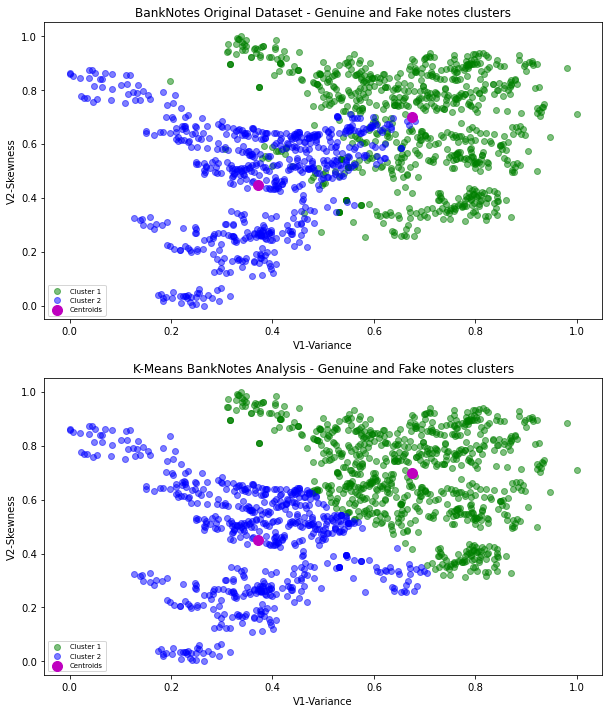

In [27]:
# plot V1 vs V2 & cluster centers
fig, ax = plt.subplots(2, 1, figsize=(10,12))
ax = ax.ravel()

# Plot Original dataset
ax[0].scatter('V1', 'V2', data=df_norm[df_val['Class'] == 1], c='g', alpha=0.5, label='Cluster 1')
ax[0].scatter('V1', 'V2', data=df_norm[df_val['Class'] == 2], c='b', alpha=0.5, label='Cluster 2')
ax[0].set_title('BankNotes Original Dataset - Genuine and Fake notes clusters')
ax[0].set_xlabel('V1-Variance')
ax[0].set_ylabel('V2-Skewness')
ax[0].scatter(arr_centers[1,:,0], arr_centers[1,:,1], s=100, c='m', label='Centroids')
ax[0].legend(loc='lower left', fontsize='x-small')

# Plot K_Means Prediction
ax[1].scatter('V1', 'V2', data=df_norm[df_val[1] == 1], c='g', alpha=0.5, label='Cluster 1')
ax[1].scatter('V1', 'V2', data=df_norm[df_val[1] == 2], c='b', alpha=0.5, label='Cluster 2')
ax[1].set_title('K-Means BankNotes Analysis - Genuine and Fake notes clusters')
ax[1].set_xlabel('V1-Variance')
ax[1].set_ylabel('V2-Skewness')
ax[1].scatter(arr_centers[1,:,0], arr_centers[1,:,1], s=100, c='m', label='Centroids')
ax[1].legend(loc='lower left', fontsize='x-small')